<a href="https://colab.research.google.com/github/Tatiana130197/statistical-workshop/blob/main/task_third_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 3

1) Реализовать последовательный тест и применить к образцам.

Идея: разбить последовательность $x_1, x_2, x_3, \ldots, x_{2n}$ на последовательные ряды длиной 2:
$(x_1, x_2), (x_3, x_4), \ldots, (x_{2n-1}, x_{2n})$ и рассмотрим каждый элемент как случайную и независимую
точку в двумерном пространстве. Затем применяем $\chi^2$. Аналогично, можно построить серии длиной 3, 4 и т.д.



In [10]:
import numpy as np
from scipy import stats

def rng(mod = 2**32, mult = 1103515245, inc = 12345):
    rng.state = (mult * rng.state + inc) % mod
    return rng.state / mod

rng.state = 1

rand_vals = np.array([rng() for _ in range(1000)])

pairs = rand_vals.reshape(-1, 2)

bins = 20
hist = np.histogram2d(pairs[:, 0], pairs[:, 1],
    bins = [np.linspace(0, 1, bins + 1), np.linspace(0, 1, bins + 1)]
)

obs_counts = hist[0].flatten()
exp_counts = np.full_like(obs_counts, obs_counts.sum() / (bins ** 2), dtype=np.float64)

# тест
chi2_stat, p_value = stats.chisquare(obs_counts, exp_counts)
print(f"chi^2 = {chi2_stat:.2f}, p-value = {p_value:.4f}")


chi^2 = 391.20, p-value = 0.6004




---


3) Проведите статистический тест, чтобы показать, что у rng_bad есть проблемы, а у rng_good - нет.

In [ ]:
def rng_bad(mod = 2 ** 31, mult = 65539, inc = 0):
    rng_bad.state = (mult * rng_bad.state + inc) % mod
    return rng_bad.state / mod

rng_bad.state = 1

rand_vals = np.array([rng_bad() for _ in range(1000)])
pairs = rand_vals.reshape(-1, 2)

bins = 20
hist = np.histogram2d(pairs[:, 0], pairs[:, 1],
                      bins=[np.linspace(0, 1, bins + 1), np.linspace(0, 1, bins + 1)])[0]

obs_counts = hist.flatten()
exp_counts = np.full_like(obs_counts, obs_counts.sum() / (bins ** 2), dtype=np.float64)


chi2_stat, p_value = stats.chisquare(obs_counts, exp_counts)

# rng_bad -- хороший или плохой?
print(f"chi^2 = {chi2_stat:.2f}, p-value = {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Генератор rng_bad случайных чисел равномерно распределён.")
else:
    print("Генератор rng_bad имеет проблемы (не равномерное распределение).")


chi^2 = 456.80, p-value = 0.0240
Генератор rng_bad имеет проблемы (не равномерное распределение).




---


4) Смоделируйте выборку из 1000 человек из дискретного распределения по набору цифр $0, 1, 2, \ldots, 9$ с весами $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Постройте гистограмму на основе выборки. Оптимизируйте алгоритм, упорядочив веса.

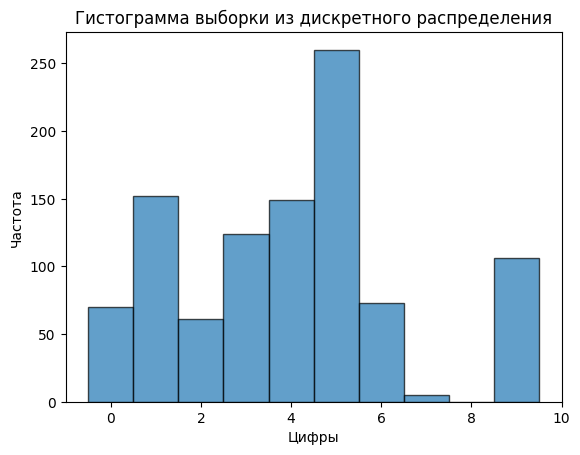

Веса: [0.05973121 0.14932802 0.08312593 0.11946242 0.15430562 0.26879044
 0.05525137 0.0099552  0.00049776 0.09955202]
Сумма весов: 1.0


In [ ]:
import matplotlib.pyplot as plt

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights /= weights.sum()

digits = np.arange(10)
sample = np.random.choice(digits, size=1000, p=weights)


plt.hist(sample, bins=np.arange(-0.5, 10.5, 1), alpha=0.7, edgecolor='black')
plt.ylabel("Частота")
plt.xlabel("Цифры")
plt.title("Гистограмма выборки из дискретного распределения")
plt.show()

print("Веса:", weights)
print("Сумма весов:", np.sum(weights))





---

5) Смоделируйте выборку размером 1000 из распределения $\operatorname{Exp}(\lambda)$, используя метод обратного преобразования. Постройте гистограмму выборки и точный график плотности распределения.


Идея метода обратного преобразования заключается в следующем предложении:
Если $\xi$ имеет равномерное распределение в $[0,1]$, то $F^ {-1}(\xi)$ распределяется в соответствии с законом $F$.


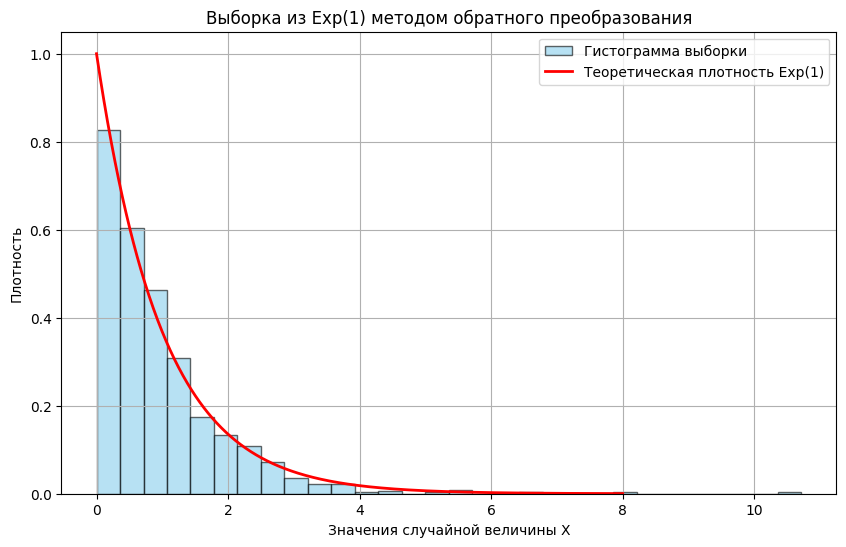

In [ ]:
n_samples = 1000
rand_vals = np.array([rng() for _ in range(n_samples)])

# F(x) = 1 - exp(-x)  =>  x = -ln(1 - u), где u ~ U[0,1]
ex_sample = -np.log(1 - rand_vals)

x = np.linspace(0, 8, 1000)
theory_density = np.exp(-x)

plt.figure(figsize=(10, 6))
plt.hist(ex_sample, bins=30, density = True, alpha = 0.6, color = 'skyblue', edgecolor = 'black', label = "Гистограмма выборки")
plt.plot(x, theory_density, 'r-', linewidth=2, label = "Теоретическая плотность Exp(1)")
plt.xlabel("Значения случайной величины X")
plt.ylabel("Плотность")
plt.title("Выборка из Exp(1) методом обратного преобразования")
plt.grid(True, which='both', axis='both')
plt.legend()
plt.show()




---

6) Выполнить следующие задания:

*  Обоснуйте (устно), что метод "принять-отклонить" действительно использует выборку из требуемого распределения.
*  Cмоделируйте $1000$ точек из распределения с плотностью $e^x cos^2x \cdot \mathbf{I}_{[-\frac\pi2, \frac\pi2]}$. Постройте гистограмму выборки на образце и сравните ее с графиком точной функции плотности.


**Отбор проб с отбраковкой (метод "Принять-отклонить"):**

Идея метода состоит в том, чтобы сделать выборку из распределения, из которого мы знаем, как делать выборку, а затем выбрать точки, которые соответствуют желаемому распределению. Точнее: допустим, мы знаем, как выполнить выборку из распределения с плотностью $p$, и мы хотим выполнить выборку из распределения с плотностью $\pi$. Давайте возьмем случайный $x$ из распределения $p$. Затем возьмем $y$, равномерно распределенный на интервале $[0, p(x)]$. Если точка $(x, y)$ попадает под график $\pi$, мы берем $x$ в качестве элемента выборки из $\pi$. Если нет, мы повторяем процедуру для нового $x$.


**Объяснение метода "принять-отклонить":**

1. Сначала из распределения с плотностью $p(x)$ выбирается $x$, затем генерируется $y$ равномерно на $[0, p(x)]$.

2. Точка $(x, y)$ принимается, если $y < \pi(x)$. Вероятность принятия $x$ равна $\frac{\pi(x)}{p(x)}$.

3. Таким образом, маргинальная плотность принятых $x$ пропорциональна $p(x) \cdot \frac{\pi(x)}{p(x)} = \pi(x)$, то есть принятые точки распределены по $\pi(x)$.


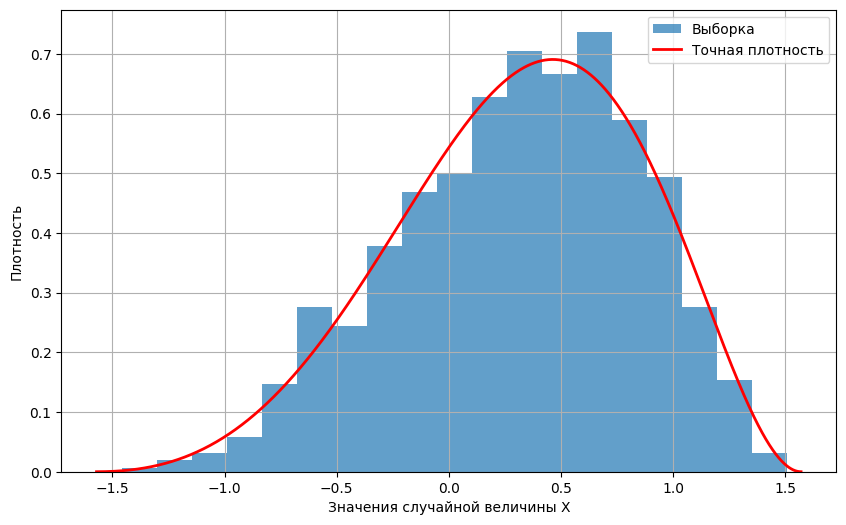

In [ ]:
def rng(mod=2**32, mult=1103515245, inc=12345, seed=1):
    state = seed
    while True:
        state = (mult * state + inc) % mod
        yield state / mod

def f(x):
    return np.exp(x) * (np.cos(x) ** 2)

x_min, x_max = -np.pi/2, np.pi/2

xs = np.linspace(x_min, x_max, 1000)
f_max = np.max(f(xs))

integral = quad(f, x_min, x_max)[0]

def f_exact(x):
    return f(x) / integral

n_samples = 1000
samples = []
rand_gen = rng(seed=42)

while len(samples) < n_samples:
    x_candidate = x_min + next(rand_gen) * (x_max - x_min)
    u = next(rand_gen)
    if u <= f(x_candidate) / f_max:
        samples.append(x_candidate)

plt.figure(figsize=(10, 6))
bins = 'auto'
plt.hist(samples, bins = bins, density = True, alpha = 0.7, label = "Выборка")
x_vals = np.linspace(x_min, x_max, 1000)
plt.plot(x_vals, f_exact(x_vals), 'r-', lw = 2, label = "Точная плотность")
plt.xlabel("Значения случайной величины X")
plt.ylabel("Плотность")

plt.grid(True, which='both', axis='both')
plt.legend()
plt.show()




---


7) Смоделируйте и изобразите выборку из 500 точек, равномерно распределенных внутри данного треугольника, без использования метода отбора.

**Метод преобразования координат** \
Метод "принять-отклонить" в некоторых случаях может быть неэффективным и требовать слишком большого количества точек выборки. Альтернативой является попытка найти преобразование координат, которое преобразует простую область (из которой легко сделать выборку, например, единичный квадрат) в требуемую область, но сохраняет соотношение площадей (почему?).


Ответ:
Потому что преобразование, сохраняющее соотношение площадей, важно, чтобы равномерное распределение точек в исходной области (например, единичном квадрате) оставалось равномерным в целевой области. Это достигается, если преобразование сохраняет меру, то есть площадь, что предотвращает искажение плотности точек.

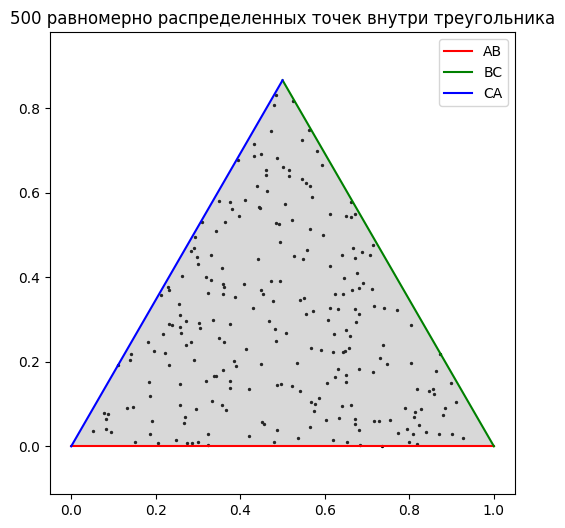

In [11]:
A = np.array([0, 0])
B = np.array([1, 0])
C = np.array([0.5, np.sqrt(3) / 2])


n_points = 500
u = np.random.rand(n_points)
v = np.random.rand(n_points)

# барицентрические координаты P = u * B + v * C + (1 - u - v) * A
# Мы выбираем только u + v <= 1

mask = u + v <= 1
u_valid = u[mask]
v_valid = v[mask]

points = (1 - u_valid - v_valid)[:, np.newaxis] * A + u_valid[:, np.newaxis] * B + v_valid[:, np.newaxis] * C

plt.figure(figsize=(6, 6))
plt.plot([A[0], B[0]], [A[1], B[1]], 'r-', label = 'AB')
plt.plot([B[0], C[0]], [B[1], C[1]], 'g-', label = 'BC')
plt.plot([C[0], A[0]], [C[1], A[1]], 'b-', label = 'CA')
plt.scatter(points[:, 0], points[:, 1], c = 'black', s = 2)
plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], 'gray', alpha = 0.3)
plt.legend()
plt.axis('equal')
plt.title('500 равномерно распределенных точек внутри треугольника')
plt.show()




---

8) Смоделируйте без использования метода выборки выборку из 500 точек, равномерно распределенных внутри единичной окружности. Изобразите полученные точки. Действительно ли они равномерно заполняют окружность?

Ответ: Действительно, точки равномерно заполняют окружность, потому что углы \(\theta\) распределены равномерно по всему кругу, а радиусы \(r\) генерируются как \(r = \sqrt{U}\), где \(U\) — случайное число от 0 до 1. Это важно, потому что площадь круга пропорциональна \(r^2\), и такое распределение радиусов гарантирует, что точки равномерно заполняют не только периметр, но и всю площадь окружности.

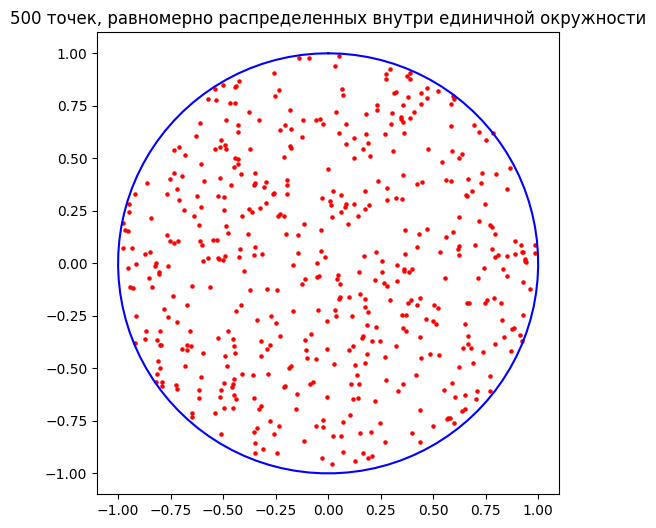

In [12]:
N = 500

theta = np.random.uniform(0, 2 * np.pi, N)
r = np.sqrt(np.random.uniform(0, 1, N))

x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='red', s=5)
plt.title("500 точек, равномерно распределенных внутри единичной окружности")
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(np.sin(np.linspace(0, 2*np.pi, 100)), np.cos(np.linspace(0, 2*np.pi, 100)), color='blue')  # Окружность
plt.show()




---

9) Выполнить следующие задания:

* Докажите, что алгоритм Алгоритм Бокса-Мюллера (https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) генерирует выборку независимых $N(0,1)$ случайных величин.

Ответ:\
Алгоритм Бокса-Мюллера генерирует пару независимых случайных величин $Z_1$ и $Z_2$, распределённых по нормальному закону $N(0, 1)$, из двух независимых случайных величин $U_1$ и $U_2$, равномерно распределённых на интервале $[0, 1]$.

1. **Генерация случайных величин**:
   - $U_1, U_2 \sim \mathcal{U}(0, 1)$.

2. **Преобразование**:
   - $R = \sqrt{-2 \ln U_1}$ — радиус.
   - $\theta = 2\pi U_2$ — угол.

3. **Получение нормальных величин**:
   - $Z_1 = R \cos(\theta)$
   - $Z_2 = R \sin(\theta)$

### Доказательство:
- **Нормальность**:
   $R$ имеет распределение $N(0, 1)$, а $\theta$ равномерно распределён на $[0, 2\pi]$. Таким образом, $Z_1$ и $Z_2$ имеют нормальное распределение $N(0, 1)$.
  
- **Независимость**:
   Поскольку $R$ и $\theta$ независимы, $Z_1$ и $Z_2$ также независимы.

Алгоритм Бокса-Мюллера генерирует две независимые случайные величины, распределённые как $N(0, 1)$.



* Измените метод, чтобы исключить вызовы тригонометрических функций `np.sin` и `np.cos`.
Используя модифицированный метод, смоделируйте размер выборки в $ 1000$ из $2D$ гауссова распределения со средним значением $\mu$ и ковариационной матрицей $\Sigma$, где
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$


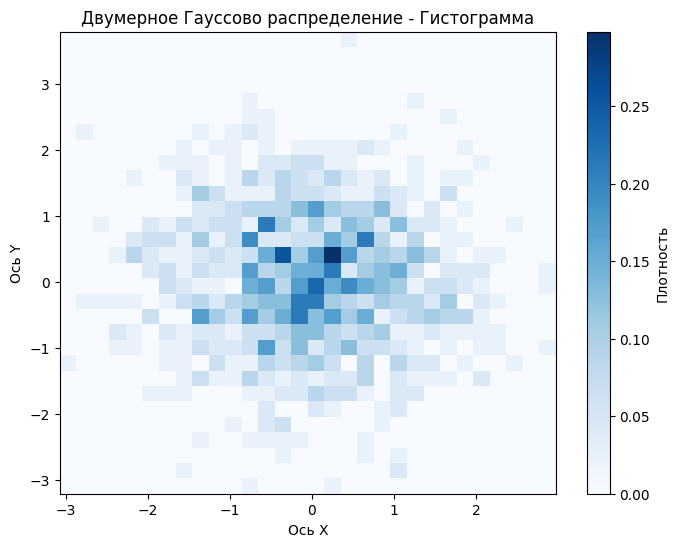

In [23]:
n = 1000

u1, u2 = np.random.rand(2, n)

r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize = (8, 6))
plt.hist2d(x, y, bins = 30, cmap = 'Blues', density = True)
plt.colorbar(label = 'Плотность')
plt.title('Двумерное Гауссово распределение - Гистограмма')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()

* Сравните среднее значение выборки и ковариационную матрицу с точными значениями.

In [31]:
from scipy.linalg import cholesky

n = 1000
Z = np.zeros((n, 2))
i = 0

while i < n:
    u1, u2 = np.random.uniform(-1, 1, 2)
    s = u1**2 + u2**2
    if s < 1:
        factor = np.sqrt(-2 * np.log(s) / s)
        Z[i, 0] = u1 * factor
        Z[i, 1] = u2 * factor
        i += 1

mu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

L = cholesky(sigma, lower=True)
X = mu + Z @ L.T
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)

print(sample_mean, sample_cov)

[4.02517527 6.73834476] [[19.39567475 -5.05235129]
 [-5.05235129 39.26383369]]
